In [15]:
!pip3 install gensim
!pip3 install pyLDAvis
!pip3 install numpy
!pip3 install wordcloud



import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ermi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
df = pd.read_csv('cleaned_tweet_data.csv')

In [17]:
df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,188.0,43.0,davideiacovozzi,18,18,NaN,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",NaN
1,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,NaN,0.175000,en,NaN,NaN,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",NaN
2,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,193.0,26.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",NaN
3,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,620.0,213.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",NaN
4,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,1787.0,417.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",NaN


In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['original_text'][0]

# convert all original_text fields to strings
df['original_text'] = df['original_text'].astype(str)
df['clean_text'] = df['original_text'].str.replace('[^\w\s]','')
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# re.sub('\w*\d\w*', '', text)
df['clean_text'] = df['clean_text'].str.replace('\w*\d\w*','')
# df.head()


# normally we tokenize using words so each word as a token
#Lines 4 to 6
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

df[['polarity','original_text','clean_text']].head()

/tmp/ipykernel_9093/3730894449.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['original_text'].str.replace('[^\w\s]','')
/tmp/ipykernel_9093/3730894449.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['clean_text'].str.replace('\w*\d\w*','')


,polarity,original_text,clean_text
0,0.16,RT @NorthstarCharts: The 10-year yield is tell...,rt northstarchart the yield tell us there high...
1,NaN,RT @MichaelAArouet: German 10y mortgage rate w...,rt michaelaarouet german mortgag rate went can...
2,0.00,RT @goldseek: When? https://t.co/kO2FfHKaZg,rt goldseek when
3,0.00,RT @charliebilello: The 30-year mortgage rate ...,rt charliebilello the mortgag rate us rise hig...
4,-0.40,RT @biancoresearch: Rates rise until something...,rt biancoresearch rate rise someth break anyth...


In [21]:
for index, row in df['clean_text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    if score['neg'] > score['pos']:
        df.loc[index, "sentiment"] = "negative"
    elif score['pos'] > score['neg']:
        df.loc[index, "sentiment"] = "positive"
    else:
        df.loc[index, "sentiment"] = "neutral"
        
    df.loc[index, 'neg'] = score['neg']
    df.loc[index, 'neu'] = score['neu']
    df.loc[index, 'pos'] = score['pos']
    
df.head(10)

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text,sentiment,neg,neu,pos
0,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.160000,0.540000,en,188.0,43.0,davideiacovozzi,18,18,NaN,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",NaN,rt northstarchart the yield tell us there high...,negative,0.130,0.870,0.000
1,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,NaN,0.175000,en,NaN,NaN,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",NaN,rt michaelaarouet german mortgag rate went can...,neutral,0.000,1.000,0.000
2,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.000000,0.000000,en,193.0,26.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",NaN,rt goldseek when,neutral,0.000,1.000,0.000
3,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.000000,0.183333,en,620.0,213.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",NaN,rt charliebilello the mortgag rate us rise hig...,negative,0.130,0.870,0.000
4,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.400000,0.400000,en,1787.0,417.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",NaN,rt biancoresearch rate rise someth break anyth...,negative,0.279,0.721,0.000
5,2022-04-19 10:59:33+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @LanceRoberts: Buying opportunities like th...,-0.100000,0.550000,en,1156.0,162.0,davideiacovozzi,18,18,False,"[{'text': 'bonds', 'indices': [78, 84]}]","[{'screen_name': 'LanceRoberts', 'name': 'Lanc...",NaN,rt lancerobert buy opportun like occur everi y...,positive,0.000,0.783,0.217
6,2022-04-19 10:58:15+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MacroAlf: Welcome to September 2018.\n\nBo...,0.400000,0.637500,en,802.0,45.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'MacroAlf', 'name': 'Alf', 'i...",NaN,rt macroalf welcom septemb bond market test ri...,positive,0.119,0.739,0.142
7,2022-04-18 09:31:42+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @BotBenFranklin: The horse thinks one thing...,0.000000,0.000000,en,18.0,4.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'BotBenFranklin', 'name': 'Be...",NaN,rt botbenfranklin the hors think one thing sad...,neutral,0.000,1.000,0.000
8,2022-04-17 22:04:00+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @Galactic_Trader: Global growth optimism at...,0.488281,0.250000,en,49.0,4.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'Galactic_Trader', 'name': 'J...",NaN,rt galactic_trad global growth optim time low ...,positive,0.126,0.719,0.156
9,2022-04-17 18:21:46+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @AndreasSteno: This is the most important c...,0.450000,0.750000,en,882.0,176.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'AndreasSteno', 'name': 'Andr...",NaN,rt andreassteno thi import chart world demand ...,negative,0.214,0.786,0.000


In [22]:
tweet_neg = df[df["sentiment"] == "negative"]
tweet_neu = df[df["sentiment"] == "neutral"]
tweet_pos = df[df["sentiment"] == "positive"]
#function for calculating the percentage of all the sentiments
def calc_percentage(x,y):
    return x/y * 100
pos_per = calc_percentage(len(tweet_pos), len(df))
neg_per = calc_percentage(len(tweet_neg), len(df))
neu_per = calc_percentage(len(tweet_neu), len(df))


print("positive: {} {}%".format(len(tweet_pos),  format(pos_per, '.1f')))
print("negative: {} {}%".format(len(tweet_neg), format(neg_per, '.1f')))
print("neutral: {} {}%".format(len(tweet_neu), format(neu_per, '.1f')))

positive: 5597 34.2%
negative: 3578 21.9%
neutral: 7192 43.9%


<BarContainer object of 3 artists>

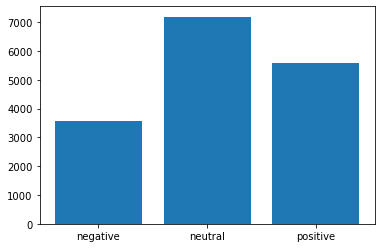

In [23]:
labels = df.groupby('sentiment').count().index.values
values = df.groupby('sentiment').size().values
plt.bar(labels, values)

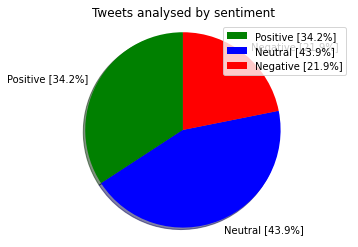

In [24]:
labels = ['Positive ['+format(pos_per, '.1f')+'%]', 'Neutral ['+format(neu_per,'.1f')+'%]', 'Negative ['+format(neg_per,'.1f')+'%]']
sizes = [len(tweet_pos), len(tweet_neu), len(tweet_neg)]
colors = ['green', 'blue', 'red']
patches, texts = plt.pie(sizes, labels = labels, colors = colors,shadow = True, startangle = 90)
plt.legend(labels)
plt.title("Tweets analysed by sentiment")
plt.axis('equal')
plt.show()

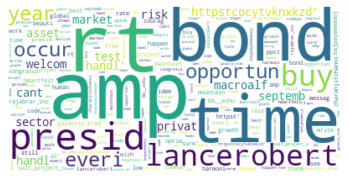

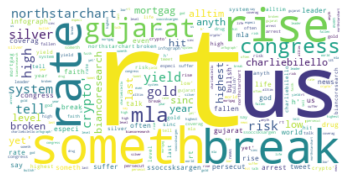

In [25]:
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = "white", max_words = 3000, stopwords = stopwords, repeat = True)
    wc.generate(str(text))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
#word cloud for positive sentiments
create_wordcloud(tweet_pos["clean_text"].values)
#wordcloud for negative sentimenst
create_wordcloud(tweet_neg["clean_text"].values)